In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_380/3465571729.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  im

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import json

In [4]:
# file = (pd.read_json("santacruz_auxiliary_lane.geojson"))

In [5]:
# file

In [6]:
# import json
# with open('project_location2.json') as json_file: 
#     data = json.load(json_file) 
# print(data['polygons'][0]['geometry']['coordinates'][0])

In [7]:
## error reading due to len of arrays not matching
# line = pd.read_json("eb_greenway_files/project_location.json")

#### Project to Shape file

In [8]:
multimodal_street = gpd.read_file('santacruz_multimodal_street.geojson')

In [9]:
multimodal_street

,geometry
0,"POLYGON ((-121.87154 36.97216, -121.87173 36.9..."


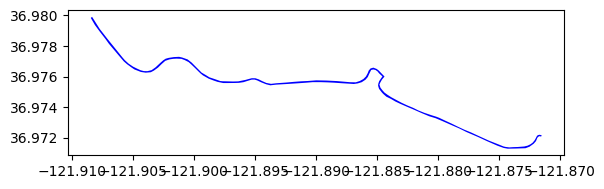

In [10]:
ax = multimodal_street.plot(color='blue')

In [11]:
# multimodal_street.to_file('sc_multimodal_street.shp')  

In [12]:
bikeped_overcrossing = gpd.read_file('santacruz_bikeped_overcrossing.geojson')

In [13]:
bikeped_overcrossing

,geometry
0,"MULTILINESTRING ((-121.91180 36.97533, -121.90..."


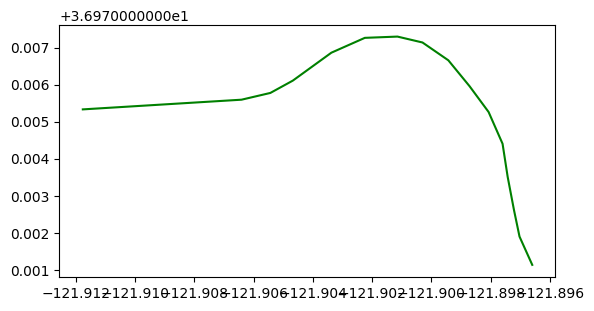

In [14]:
ax2 = bikeped_overcrossing.plot(color="green")

In [15]:
# bikeped_overcrossing.to_file('sc_bikeped_overcrossing.shp')  

In [16]:
auxiliary_lane = gpd.read_file('santacruz_auxiliary_lane.geojson')

In [17]:
auxiliary_lane

,geometry
0,"MULTILINESTRING ((-121.88405 36.97408, -121.88..."


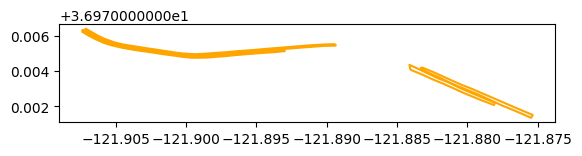

In [18]:
ax3 = auxiliary_lane.plot(color="orange")

In [19]:
# proj3.to_file('sc_auxiliary_lane.shp')  

In [20]:
bus_on_shoulder = gpd.read_file('santacruz_bus_on_shoulder.geojson')

In [21]:
bus_on_shoulder

,geometry
0,"MULTILINESTRING ((-121.89204 36.97521, -121.89..."


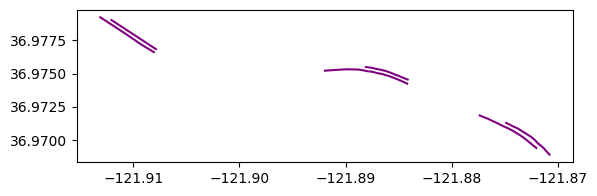

In [22]:
ax4 = bus_on_shoulder.plot(color="purple")

In [23]:
# bus_on_shoulder.to_file('sc_bus_on_shoulder.shp')  

#### Concat Project locations

In [24]:
#### for bike ped
proj_bike_ped = gpd.GeoDataFrame(pd.concat([multimodal_street, bikeped_overcrossing]))

<AxesSubplot:>

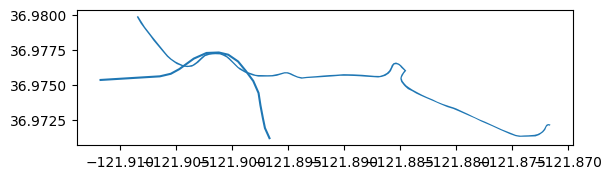

In [25]:
proj_bike_ped.plot()

In [26]:
# proj_bike_ped.to_file('sc_proj_bike_ped.shp')  

In [27]:
## for car 

proj_car = gpd.GeoDataFrame(pd.concat([multimodal_street, auxiliary_lane]))

<AxesSubplot:>

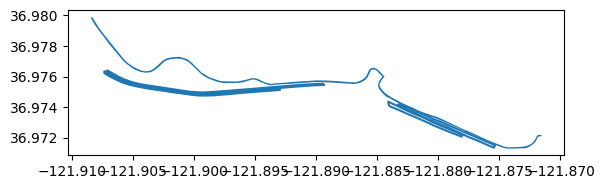

In [28]:
proj_car.plot()

In [29]:
# proj_car.to_file('sc_proj_car.shp')  

In [30]:
## for transit

proj_transit = gpd.GeoDataFrame(pd.concat([multimodal_street, bus_on_shoulder]))

<AxesSubplot:>

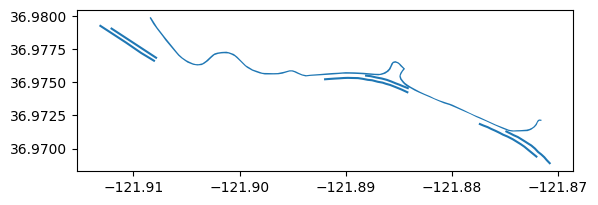

In [31]:
proj_transit.plot()

In [32]:
# proj_transit.to_file('sc_proj_transit.shp')  

### Get Routes from GTFS Data

In [33]:
import os
os.environ["CALITP_BQ_MAX_BYTES"] = str(800_000_000_000) ## 800GB?

In [34]:
from shared_utils import gtfs_utils_v2
from shared_utils import gtfs_utils
from shared_utils import geography_utils
import datetime
from siuba import *

In [35]:
analysis_date = datetime.date(2022, 11, 28)

In [36]:
FEED = '02fbd8719f99b906e65b2cf86cbb7cae'


In [37]:
keep_shape_cols = [
       "feed_key", "activity_date", 
       "shape_id", "shape_array_key",
       "n_trips"]

In [38]:
test_feed_keys = [
    "02fbd8719f99b906e65b2cf86cbb7cae", # Santa Cruz Schedule
    # "f8d3bfd9e780aa3b3ce1340b2116513f" # Long Beach Schedule
]
test_cases = [
    "Santa Cruz", 
    # "Metrolink Schedule"
]

In [39]:
shapes = gtfs_utils_v2.get_shapes(
    selected_date = analysis_date,
    operator_feeds = test_feed_keys,
    shape_cols = ["feed_key", "shape_id", "shape_array_key",
                 "n_trips"],
    get_df = True,
    crs = "EPSG:3310",
)

/opt/conda/lib/python3.9/site-packages/sqlalchemy_bigquery/_types.py:101: SAWarning: Did not recognize type 'GEOGRAPHY' of column 'pt_array'


In [40]:
shapes

,feed_key,shape_id,shape_array_key,n_trips,geometry
0,02fbd8719f99b906e65b2cf86cbb7cae,74S0004,85a29b24b386a0feb3d6fc90c2294fb6,1,"LINESTRING (-156602.745 -121551.079, -156584.8..."
1,02fbd8719f99b906e65b2cf86cbb7cae,350066,d9b6ee346d02334b957aea08689ec7a4,1,"LINESTRING (-184682.089 -104159.840, -184682.6..."
2,02fbd8719f99b906e65b2cf86cbb7cae,660011,83ac025461fa9e3d70693faa7a13854c,1,"LINESTRING (-174775.662 -113900.251, -174774.2..."
3,02fbd8719f99b906e65b2cf86cbb7cae,350034,34322dc04ea0f4aa70aaaf5059c519bf,1,"LINESTRING (-188298.722 -96873.513, -188301.96..."
4,02fbd8719f99b906e65b2cf86cbb7cae,350071,4a16ac936ef04254c3c8d32b520fb82d,1,"LINESTRING (-190183.875 -89076.487, -190184.09..."
5,02fbd8719f99b906e65b2cf86cbb7cae,350084,5d133e126244f825379bb0b6d9ff1b10,1,"LINESTRING (-188298.722 -96873.513, -188301.96..."
6,02fbd8719f99b906e65b2cf86cbb7cae,350033,b5735fd62d2115c66518de7efdb91304,1,"LINESTRING (-188312.457 -96947.922, -188345.47..."
7,02fbd8719f99b906e65b2cf86cbb7cae,74S0003,ab8ee62afdc185dc11a5df12edc005d0,1,"LINESTRING (-156602.745 -121551.079, -156584.8..."
8,02fbd8719f99b906e65b2cf86cbb7cae,350067,995941e075ee891a866bd7d69f5cf880,1,"LINESTRING (-184682.089 -104159.840, -184682.6..."
9,02fbd8719f99b906e65b2cf86cbb7cae,660010,4ab6871d6667b6b81e3689e60f34fd18,1,"LINESTRING (-179972.670 -114317.287, -179934.5..."


<AxesSubplot:>

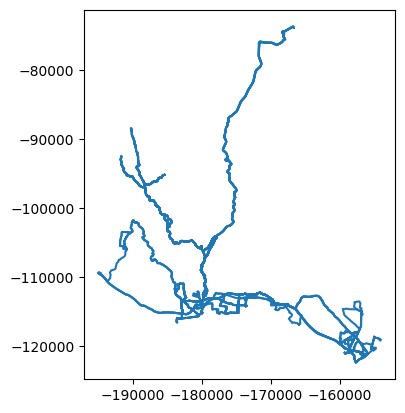

In [41]:
shapes.plot()

In [42]:
import siuba
from calitp_data_analysis.tables import tbls
from typing import Literal, Union


In [43]:
def subset_cols(cols: list) -> siuba.dply.verbs.Pipeable:
    """
    Select subset of columns, if column list is present.
    Otherwise, skip.
    """
    if cols:
        return select(*cols)
    elif not cols or len(cols) == 0:
        # Can't use select(), because we'll select no columns
        # But, without knowing full list of columns, let's just
        # filter out nothing
        return filter()
def filter_date(
    selected_date: Union[str, datetime.date], date_col: Literal["service_date", "activity_date"]
) -> siuba.dply.verbs.Pipeable:
    return filter(_[date_col] == selected_date)

def filter_operator(operator_feeds: list, include_name: bool = False) -> siuba.dply.verbs.Pipeable:
    """
    Filter if operator_list is present.
    For trips table, operator_feeds can be a list of names or feed_keys.
    For stops, shapes, stop_times, operator_feeds can only be a list of feed_keys.
    """
    # in testing, using _.feed_key or _.name came up with a
    # siuba verb not implemented
    # https://github.com/machow/siuba/issues/407
    # put brackets around should work
    if include_name:
        return filter(_["feed_key"].isin(operator_feeds) | _["name"].isin(operator_feeds))
    else:
        return filter(_["feed_key"].isin(operator_feeds))


In [44]:
##### TRIPS

keep_trip_cols = [
            "feed_key", "name", "regional_feed_type", 
            "service_date", "trip_key", "trip_id",
            "route_key", "route_id", "route_type", 
            "route_short_name", "route_long_name", "route_desc",
            "direction_id", 
            "shape_array_key", "shape_id",
            "trip_first_departure_sec", "trip_last_arrival_sec",
            "service_hours"]

In [45]:
trips = (
        tbls.mart_gtfs.fct_daily_scheduled_trips()
        >> filter_date(analysis_date, date_col="service_date")
        >> filter_operator(test_feed_keys, include_name=True)
)

trips = trips >> subset_cols(keep_trip_cols) >> collect()


In [46]:
trips.head()

,feed_key,name,regional_feed_type,service_date,trip_key,trip_id,route_key,route_id,route_type,route_short_name,route_long_name,route_desc,direction_id,shape_array_key,shape_id,trip_first_departure_sec,trip_last_arrival_sec,service_hours
0,02fbd8719f99b906e65b2cf86cbb7cae,Santa Cruz Schedule,None,2022-11-28,44fdbd1c70de56ad39d19ad15e221d93,3802442-202310S-vs20231S-Weekday-04,bebc56890155824d8e56b8b8c775cbb0,35E,3,35E,Highway 9/Scotts Valley via Emeline,None,0,953bd7d786c43c084ee42e01465f03ba,35E0002,28800,32340,0.983333
1,02fbd8719f99b906e65b2cf86cbb7cae,Santa Cruz Schedule,None,2022-11-28,b029ee786f7397b2a6a601c8ce37c981,3802772-202310S-vs20231S-Weekday-04,1e9265e58bb6b193bf99277d818eef36,20,3,20,UCSC via Main Gate - Delaware/Western,None,0,a743c2e0ece7372ff4d6a7cdfa664d51,200028,26700,30240,0.983333
2,02fbd8719f99b906e65b2cf86cbb7cae,Santa Cruz Schedule,None,2022-11-28,bb9c3d04722481ecf95dfd605c851e53,3802682-202310S-vs20231S-Weekday-04,85edfcd275ffa87af6e1bfa570f52451,15,3,15,UCSC via Main Gate - Laurel,None,0,74a5df527cef86fcf8ade1542aabc087,150010,36900,39420,0.700000
3,02fbd8719f99b906e65b2cf86cbb7cae,Santa Cruz Schedule,None,2022-11-28,35a9917ebb879c0b4b09cee46056b891,3802824-202310S-vs20231S-Weekday-04,0b5c818915a1ec543ad4a94e22dd4af0,04,3,04,Harvey West,None,0,1eaf44c88083e2674aa2e041855ed5fa,040008,37080,38040,0.266667
4,02fbd8719f99b906e65b2cf86cbb7cae,Santa Cruz Schedule,None,2022-11-28,0ae34668fc48bc8efb2ca58e5805d35c,3802625-202310S-vs20231S-Weekday-04,e30a6310ccb80f750a096079f8b727c5,41,3,41,Empire Grade/Bonny Doon,None,1,e6fd0a432d3d8514c7204bfcb1d5d1f2,410009,27000,30000,0.833333


In [47]:
len(trips)

526

In [48]:
(shapes.merge(trips, how="outer", indicator=True))._merge.value_counts()

both          526
left_only       0
right_only      0
Name: _merge, dtype: int64

In [49]:
df = shapes.merge(trips, how="outer", indicator=True)

In [50]:
df.columns

Index(['feed_key', 'shape_id', 'shape_array_key', 'n_trips', 'geometry',
       'name', 'regional_feed_type', 'service_date', 'trip_key', 'trip_id',
       'route_key', 'route_id', 'route_type', 'route_short_name',
       'route_long_name', 'route_desc', 'direction_id',
       'trip_first_departure_sec', 'trip_last_arrival_sec', 'service_hours',
       '_merge'],
      dtype='object')

In [51]:
df.sample(5)

,feed_key,shape_id,shape_array_key,n_trips,geometry,name,regional_feed_type,service_date,trip_key,trip_id,route_key,route_id,route_type,route_short_name,route_long_name,route_desc,direction_id,trip_first_departure_sec,trip_last_arrival_sec,service_hours,_merge
59,02fbd8719f99b906e65b2cf86cbb7cae,350095,b755444d2ad7890bbbf33a1dc72d3384,5,"LINESTRING (-191802.144 -92424.475, -191793.47...",Santa Cruz Schedule,None,2022-11-28,0a68e5ff32b6c9dac4c97b24d2599dae,3802513-202310S-vs20231S-Weekday-04,6167e9d932d9f5a879e444259651b435,35,3,35,Highway 9/Scotts Valley,None,1,71880,75240,0.933333,both
517,02fbd8719f99b906e65b2cf86cbb7cae,180004,5f0d8f26b2a157bf88248bdcbaad4d23,39,"LINESTRING (-179978.136 -114285.929, -179989.7...",Santa Cruz Schedule,None,2022-11-28,94e4ea483a1fc0c013f01c1c7db88294,3802742-202310S-vs20231S-Weekday-04,43a5d7bb3213d922be95a0429cd55495,18,3,18,UCSC via Main Gate - Mission,None,0,67200,70260,0.850000,both
302,02fbd8719f99b906e65b2cf86cbb7cae,710039,1d71ff9291f99f4f91c78107d994c5e9,15,"LINESTRING (-156602.745 -121551.079, -156584.8...",Santa Cruz Schedule,None,2022-11-28,c40cf05b7134f0798ead6ab3322c952f,3802345-202310S-vs20231S-Weekday-04,aaa8ae8bce252c57c4da59834f0adc54,71,3,71,Soquel/Freedom,None,1,29400,33600,1.166667,both
51,02fbd8719f99b906e65b2cf86cbb7cae,170063,2dff360188693fb293a2491a39d2de00,4,"LINESTRING (-179979.207 -114286.129, -179977.4...",Santa Cruz Schedule,None,2022-11-28,315fce47619b4eba238cd0552627e465,3802416-202310S-vs20231S-Weekday-04,b9a2dcc2c127e4c52785b6beb2d7e315,17,3,17,Amtrak Highway 17 Express,None,0,28080,31260,0.883333,both
326,02fbd8719f99b906e65b2cf86cbb7cae,69W0005,a449254b090da5a87c286e5c12fce94c,15,"LINESTRING (-179972.670 -114317.287, -179934.5...",Santa Cruz Schedule,None,2022-11-28,aaf98bb677b4062c829db8445c645723,3802387-202310S-vs20231S-Weekday-04,0257d3126338b9802d9c30336167e428,69W,3,69W,Capitola/Cabrillo,None,0,31020,34080,0.850000,both


In [52]:
routes_to_keep = ['69A', '69W', '71', '91X']

In [53]:
df = df>>filter(_["route_short_name"].isin(routes_to_keep))

In [54]:
df.sample()

,feed_key,shape_id,shape_array_key,n_trips,geometry,name,regional_feed_type,service_date,trip_key,trip_id,route_key,route_id,route_type,route_short_name,route_long_name,route_desc,direction_id,trip_first_departure_sec,trip_last_arrival_sec,service_hours,_merge
155,02fbd8719f99b906e65b2cf86cbb7cae,69A0006,9c7b0cbce320ff6a7a20f1fafd184577,12,"LINESTRING (-156600.649 -121553.231, -156631.1...",Santa Cruz Schedule,None,2022-11-28,009067ebe2f429e16f69f239793604dc,3802377-202310S-vs20231S-Weekday-04,96170e59868f0b20e63dd083f3f8b85f,69A,3,69A,Capitola/Airport,None,1,58800,61980,0.883333,both


<AxesSubplot:>

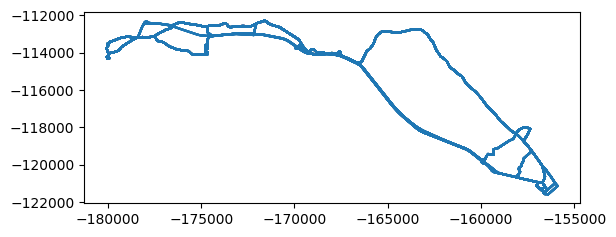

In [55]:
df.plot()

In [56]:
gdf = df>>select(_.shape_id, _.geometry)

In [57]:
gdf2 =  gpd.GeoDataFrame(gdf)

In [60]:
# gdf2.to_file('transit_route.shp')  